Enter number of jobs: 5
Enter number of dependencies for job 1: 2
Enter dependency 1 for job 1 (dependency weight): 2 5
Enter dependency 2 for job 1 (dependency weight): 3 3
Enter number of dependencies for job 2: 1
Enter dependency 1 for job 2 (dependency weight): 4 2
Enter number of dependencies for job 3: 1
Enter dependency 1 for job 3 (dependency weight): 5 4
Enter number of dependencies for job 4: 0
Enter number of dependencies for job 5: 0
Scheduled jobs:
2 depends on 4 with weight 2
1 depends on 3 with weight 3
3 depends on 5 with weight 4
1 depends on 2 with weight 5


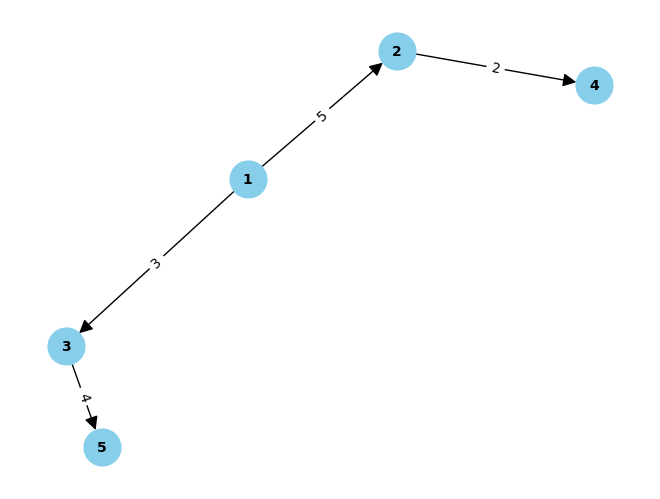

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

class JobScheduler:
    def __init__(self, jobs):
        self.jobs = jobs
        self.graph = []

    def add_dependency(self, u, v, w):
        self.graph.append([u, v, w])

    def find_parent(self, parent, i):
        if parent[i] == i:
            return i
        return self.find_parent(parent, parent[i])

    def union(self, parent, rank, x, y):
        x_root = self.find_parent(parent, x)
        y_root = self.find_parent(parent, y)

        if rank[x_root] < rank[y_root]:
            parent[x_root] = y_root
        elif rank[x_root] > rank[y_root]:
            parent[y_root] = x_root
        else:
            parent[y_root] = x_root
            rank[x_root] += 1

    def schedule_jobs(self):
        result = []
        self.graph = sorted(self.graph, key=lambda item: item[2])
        parent = []
        rank = []

        for node in range(self.jobs):
            parent.append(node)
            rank.append(0)

        for u, v, w in self.graph:
            x = self.find_parent(parent, u)
            y = self.find_parent(parent, v)

            if x != y:
                result.append([u, v, w])
                self.union(parent, rank, x, y)

        return result

    def create_networkx_graph(self):
        G = nx.DiGraph()
        for u, v, w in self.graph:
            G.add_edge(u + 1, v + 1, weight=w)
        return G

if __name__ == "__main__":
    num_jobs = int(input("Enter number of jobs: "))
    scheduler = JobScheduler(num_jobs)
    for i in range(num_jobs):
        num_dependencies = int(input(f"Enter number of dependencies for job {i+1}: "))
        for j in range(num_dependencies):
            dependency = input(f"Enter dependency {j+1} for job {i+1} (dependency weight): ").split()
            scheduler.add_dependency(i, int(dependency[0])-1, int(dependency[1]))

    scheduled_jobs = scheduler.schedule_jobs()
    print("Scheduled jobs:")
    for u, v, w in scheduled_jobs:
        print(f"{u+1} depends on {v+1} with weight {w}")

    # Create NetworkX graph
    G = scheduler.create_networkx_graph()

    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()
